In [31]:
execfile('setting.py')

df = pd.read_csv('보험_대출.csv', encoding='euc-kr')

In [32]:
def ACTL_FMLY_NU_CAT(ACTL_FMLY_NU):
    if (ACTL_FMLY_NU < 4):
        return '3명 이하'
    elif (ACTL_FMLY_NU < 6):
        return '4~5명 이하'
    else:
        return '6명 이상'

In [33]:
df['ACTL_FMLY_NU_CAT'] = df['ACTL_FMLY_NUM'].apply(ACTL_FMLY_NU_CAT)

In [35]:
cross = pd.crosstab(index=df['ACTL_FMLY_NU_CAT'], columns=df['TARGET'])
cross['rate'] = cross[1] / (cross[0] + cross[1]) * 100

In [36]:
cross

TARGET,0,1,rate
ACTL_FMLY_NU_CAT,,,
3명 이하,59309,2699,4.352664
4~5명 이하,25875,1135,4.202147
6명 이상,1636,78,4.550758


In [37]:
chi,p,dof,expected=stats.chi2_contingency(cross)
if(0.05 > p):
    print('chi-square test')
    print('해지 비율 차이가 존재한다.')
else:
    print('해지 비율 차이가 존재하지 않는다.')
print('p-value {}'.format(p))
print('검정통계량 {}'.format(chi))

chi-square test
해지 비율 차이가 존재한다.
p-value 4.0664992056926256e-16
검정통계량 78.2614423186103


<AxesSubplot:ylabel='Frequency'>

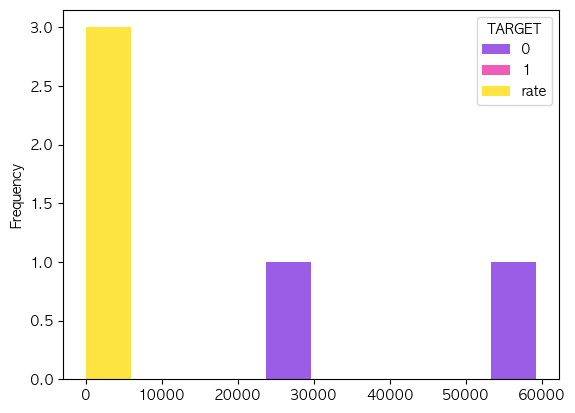

In [38]:
cross.plot.hist()